# **I. Data Collection**

In [16]:
import pandas as pd

# Load the dataset you uploaded
file_name = 'reviews.csv'
df = pd.read_csv(file_name)

In [17]:
# --- The column with the review is named 'review_text' ---
# We will select it and rename it to 'Text' for consistency.
df_selected = df[['review_text']].copy()
df_selected.rename(columns={'review_text': 'Text'}, inplace=True)

In [19]:
# Take the first 1000 reviews and remove any empty ones
df_final = df_selected.head(1000)
df_final.dropna(subset=['Text'], inplace=True)

print(f"Successfully loaded and prepared {len(df_final)} Sephora reviews.")

Successfully loaded and prepared 999 Sephora reviews.


<ipython-input-19-1364959943>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.dropna(subset=['Text'], inplace=True)


In [20]:
# Display the first 5 entries for a quick check
print("\nFirst 5 prepared text entries:")
print(df_final.head())


First 5 prepared text entries:
                                                Text
0  I absolutely L-O-V-E this oil. I have acne pro...
1  I gave this 3 stars because it give me tiny li...
2  Works well as soon as I wash my face and pat d...
3  this oil helped with hydration and breakouts, ...
4  This is my first product review ever so that s...


In [21]:
# Get 10 sample raw text entries for your report
print("\n10 Sample Raw Text Entries for Your Report:")
print(df_final['Text'].head(10).to_list())


10 Sample Raw Text Entries for Your Report:
['I absolutely L-O-V-E this oil. I have acne prone skin in my 30’s, and use this on top of my evening cream as a final moisture lock-in. Its smell is a spa-grade aromatherapy treatment that instantly relaxes me. I’ve had facial oil in my routine, previously Drunk Elephant, for years and swear by its wrinkle prevention qualities. Oily/acne prone skin can become dry out from the acids/treatments we use, and it’s important to put the moisture back in after its taken off to prevent skin from over-compensating throughout the day. The formula in Lotus does just that while keeping breakouts and pesky wrinkles away. The scent of this oil won me over and I look forward to it every evening as a final pampering. It doesn’t break me out, my skin glows after application, and one bottle lasts me at least 6 months. Just a few drops is all you need to cover the face, neck and décolleté.  If you’re on the fence, treat yourself and do it!', 'I gave this 3 sta

# **II. Text Processing**

In [35]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# --- Part 1: Preprocessing ---

# Download all necessary NLTK data models
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize lemmatizer and stopword list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text)
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(processed_tokens)

# Apply the function to create the 'Processed_Text' column
df_final['Processed_Text'] = df_final['Text'].apply(preprocess_text)
print("Text preprocessing complete.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Text preprocessing complete.


<ipython-input-36-51969214>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Processed_Text'] = df_final['Text'].apply(preprocess_text)


# **III. Feature Extraction**

Starting feature extraction...


<ipython-input-37-1687677681>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=top_20_words, palette='viridis')


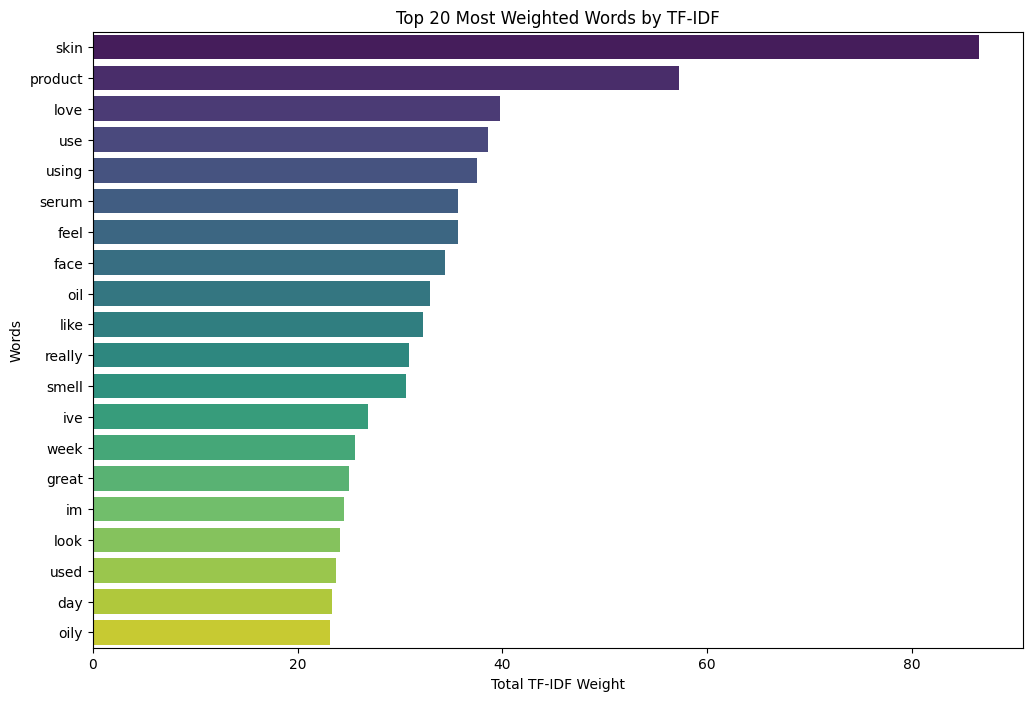

Feature extraction and visualization complete.


In [37]:
# --- Part 2: Feature Extraction ---

print("Starting feature extraction...")
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the processed text
tfidf_matrix = vectorizer.fit_transform(df_final['Processed_Text'])

# Get feature names and sum their scores
feature_names = vectorizer.get_feature_names_out()
total_tfidf_scores = tfidf_matrix.sum(axis=0).tolist()[0]

# Create a DataFrame of words and their scores
tfidf_df = pd.DataFrame({'word': feature_names, 'weight': total_tfidf_scores})

# Get the top 20 words
top_20_words = tfidf_df.sort_values(by='weight', ascending=False).head(20)

# Generate the Bar Chart Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='weight', y='word', data=top_20_words, palette='viridis')
plt.title('Top 20 Most Weighted Words by TF-IDF')
plt.xlabel('Total TF-IDF Weight')
plt.ylabel('Words')
plt.show()

print("Feature extraction and visualization complete.")

# **IV. Modelling**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00
Sentiment Distribution:
Sentiment
Positive    876
Negative     93
Neutral      30
Name: count, dtype: int64




<ipython-input-34-3736606472>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Sentiment'] = df_final['Text'].apply(get_vader_sentiment)
<ipython-input-34-3736606472>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', order=['Positive', 'Neutral', 'Negative'])


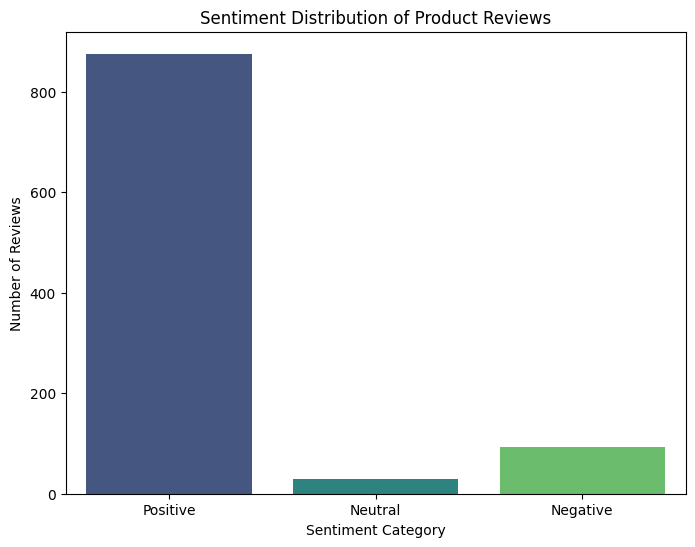

In [34]:
# Install the VADER package
!pip install vaderSentiment

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_final' is your DataFrame with the raw review 'Text' column.

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    """
    Analyzes text using VADER and returns 'Positive', 'Negative',
    or 'Neutral' based on the compound score.
    """
    scores = analyzer.polarity_scores(str(text))
    compound_score = scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the raw text column to get sentiment
df_final['Sentiment'] = df_final['Text'].apply(get_vader_sentiment)

# --- Show Sentiment Distribution ---
print("Sentiment Distribution:")
sentiment_counts = df_final['Sentiment'].value_counts()
print(sentiment_counts)
print("\n")


# --- Visualize the Results ---
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of Product Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()